<a href="https://colab.research.google.com/github/hafsaJChaudhry/hafsaJChaudhry/blob/main/SQL_pythonTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MySQL TUTORIAL CRUD Tutorial in Python**
## CRUD = *Create, Read, Update, Delete!*!

In this tutorial, we’ll explore how to perform CRUD operations using MySQL in a Python application. We’ll cover each step and provide practical examples with explanations to help you get started.
> Coded in VSC, WorkBench. Not in Google Collab.> Coded in VSC, WorkBench. Not in Google Collab.

# **Prerequisites**
Before we begin, make sure you have the following prerequisites:

1.   **MySQL Server**: MySQL should be installed and running. You can download it here https://dev.mysql.com/downloads/mysql/
2.   **Python** must be downloaded.
3. **MySQL Workbench** must be downloaded.
4. **MySQL Connector** must be downloaded. run this command in **terminal**: pip3 install mysql-connector
5. **Initialize MySQL Server**: On my Mac, go to systems preference and open MySQL icon. Press "**Initialize Database**", then create username password (REMEMBER THIS!!). Then you press "**Start MySQL Server**".
6. **Create MySQL Connection**: open workbench and press + icon.
Type connection name (your choice), then click password button and pass
in the password you used to initialize your MySQL Server. Then press "Test Connection".

# **Step 1: Connect to Python**
MySQL Database and Sever is now set up. Now we need to connect to python.
Open a Python Application, like VSC, and run this code (Dont run in Google Collab):


In [ ]:
import mysql.connector

# mySQL connection object
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
)
print(mydb)

**If successful**: terminal will return something like:

<mysql.connector.connection_cext.CMySQLConnection object at 0x10d433358>

Now Python is connected to MySQL Server!!

## **Initialize Cursor**
A cursor is an object that will communicate with your entire mysql server.

In [ ]:
mycursor = mydb.cursor()

##**Database**
**1. Create a Database**

make below code into a comment once created, otherwise everytime you run it'll give you an error that database is already created.

In [ ]:
mycursor.execute("CREATE DATABASE testdb")



2.   **To Test /  Show Databases**

If cursor is created, it should show all databases in your server.



In [ ]:
mycursor.execute("SHOW DATABASES")
for db in mycursor:
    print(db)

should return **information_schema**, **mysql**, **performance_schema**, **sys**, and then names of diff databases like **testdb** we created.

3. **To Delete Databases**

Let's say my server also has a database myDB that I no longer want.

In [ ]:
mycursor.execute("DROP DATABASE myDB")

# **Step 2: Create a Table**


> *How does MySQL work? It consists of several databases. Inside those databases are several different tables.Every table is unique. You can join tables together, select stuff from those tables, etc.*

##**Specify Database**
Go back and specify which database mydb is going to use.

In [ ]:
import mysql.connector

# mySQL connection object
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb" #!!
)

mycursor = mydb.cursor()

##**Create Table**
Let's create a table called 'students' which will store student's names and age.
> **Syntax**: CREATE TABLE table_name (col1 type(n), col2 type(n))

For our table students, we will create 2 columns: 'name' and 'age'

'name' will be type VARCHAR which is MySQL for string.

'age' will be type INTEGER. ![Screen Shot 2024-01-06 at 4.07.33 PM.png]()

In [ ]:
import mysql.connector

# mySQL connection object
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

#!!
mycursor.execute("CREATE TABLE students (name VARCHAR(255), age INTEGER(10))")

#**Display Table**


> You can use mycursor.execute("SHOW TABLES") but it will only show ('students',) in the terminal. Thats why we will use WorkBench.

To view table open up MySQL WorkBench. Refresh your schemas and it should be there!




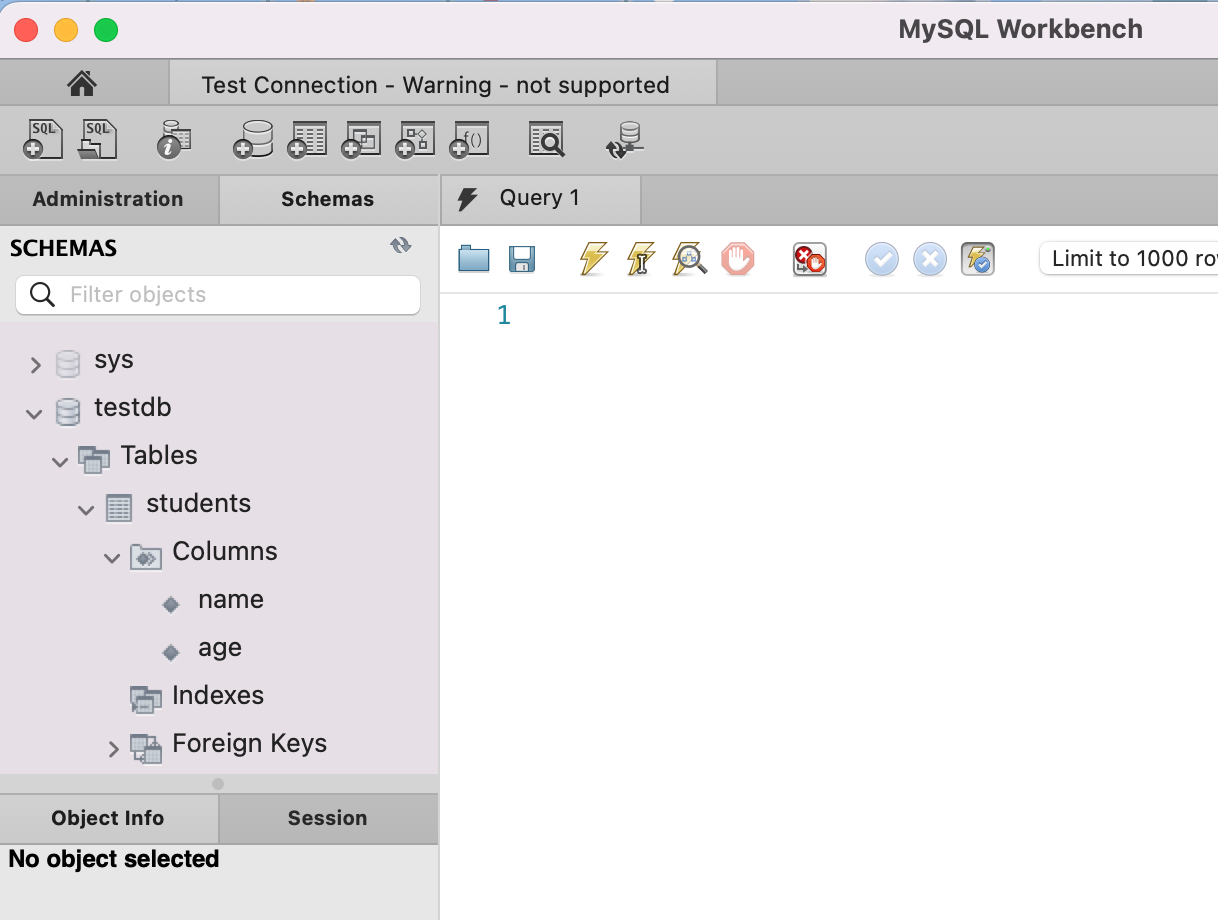

#**Step 3: Inserting and Saving Data to Table**
Let's use a python script to populate our table with values. We will use sqlFormula
>**Syntax**: "INSERT INTO table_name (col1,col2) VALUES (%s,%s))"

 where %s is a placeholder

 To **save data** as a change in our table we need to use .commit()


In [ ]:
import mysql.connector

# mySQL connection object
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

sqlFormula = "INSERT INTO students (name, age) VALUES (%s, %s)"

#create a tuple to input as data
student1 = ("Rachel", 22)

# to add the input
mycursor.execute(sqlFormula, student1)

# to save input/changes to our table - REQUIRED - wont save otherwise!!
mydb.commit()

#**Step 4: Reading Data from Table**
1. Open up WorkBench and first specify that you want to use testdb. press **lightning bolt** button to run. If successful you will get a green button in the terminal.

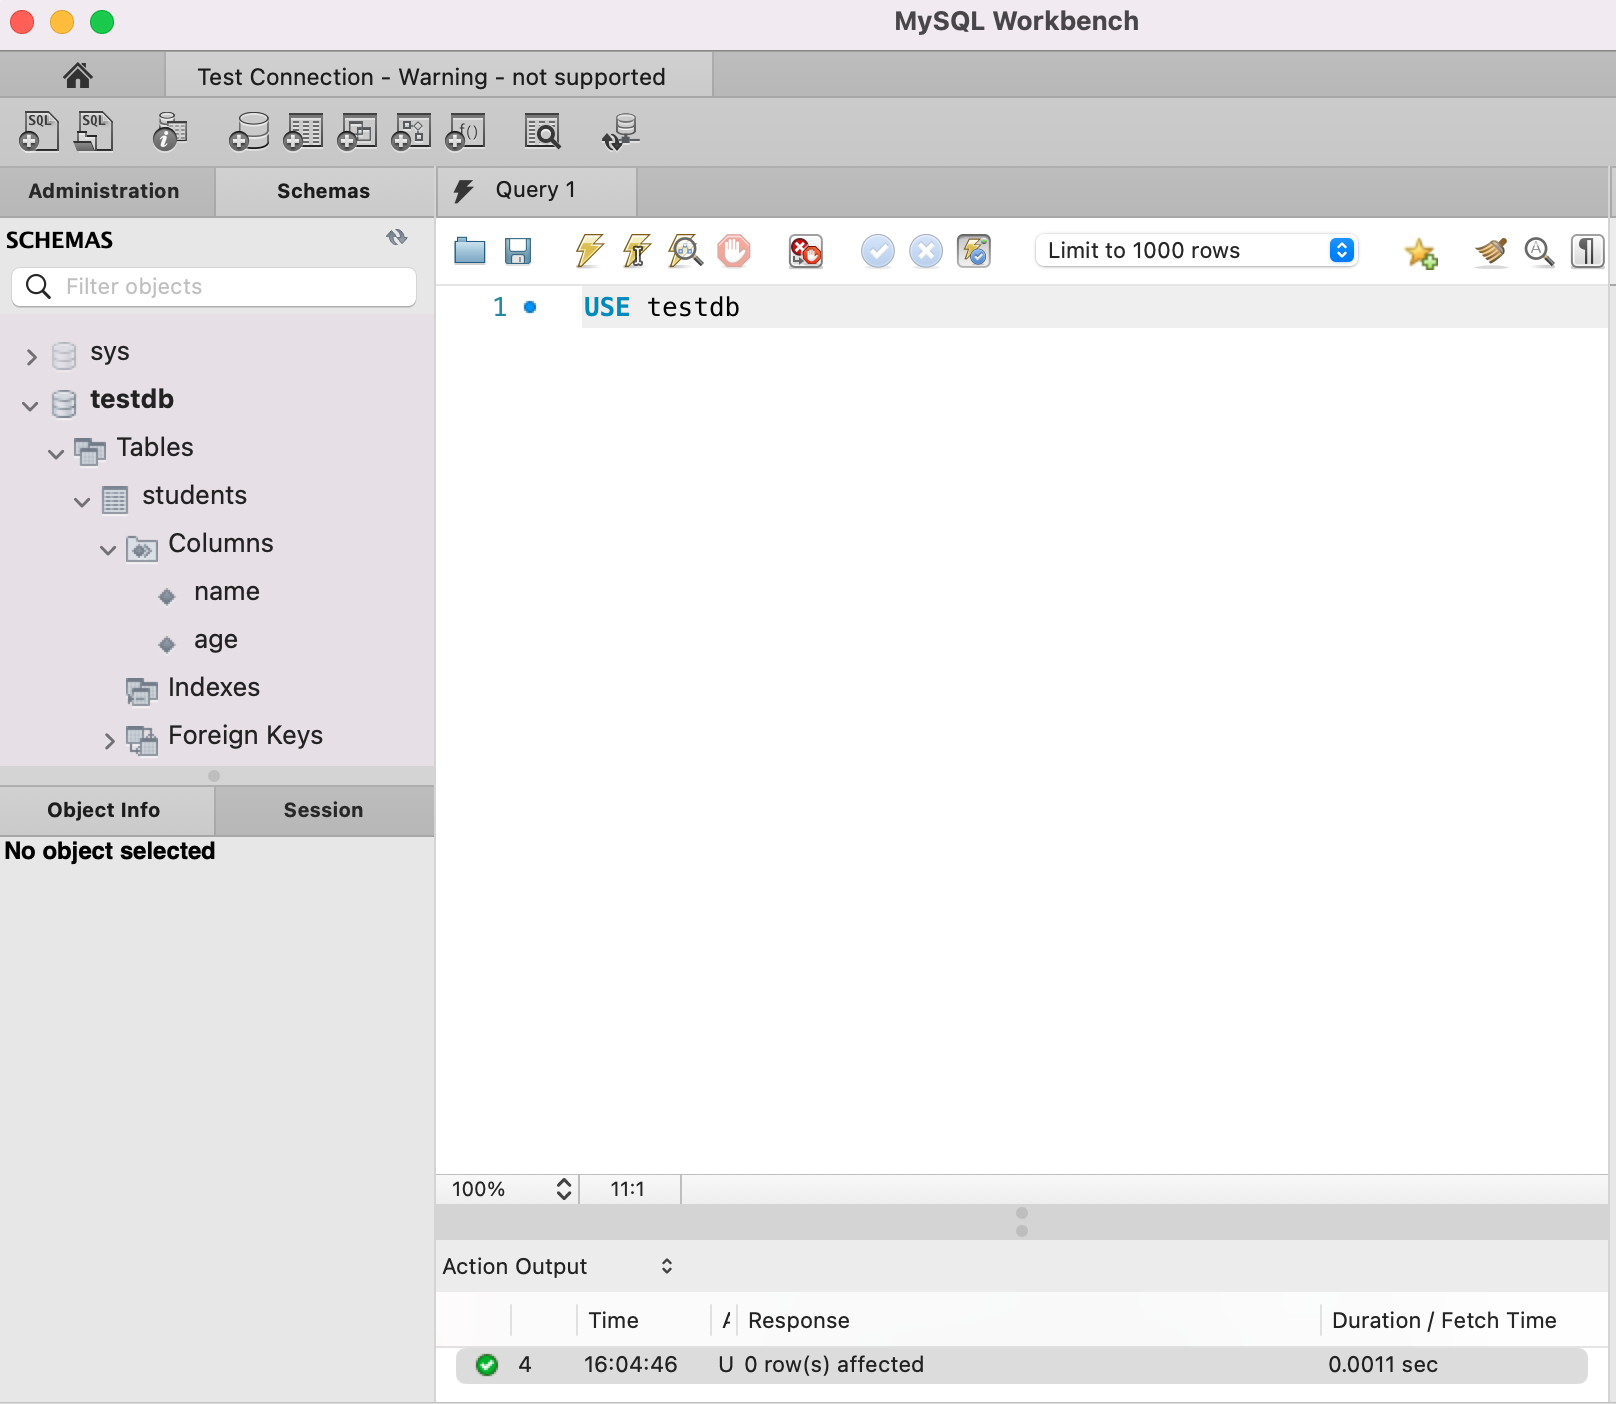

**2. Show table** in workbench by using following code (same as above screenshot). btw "*" means "all examples"

In [ ]:
SELECT *
FROM students

**If successful**: a table will pop up on workbench with a result grid showing Rachel, 22 !!

#**Step 5: Populating our Table**
Let's add more data to our table.

By using python and creating an array of tuples.
Then change .execute to **.executemany**

In [ ]:
import mysql.connector

# mySQL connection object
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

sqlFormula = "INSERT INTO students (name, age) VALUES (%s, %s)"
students = [("Bob", 21),
            ("Amanda", 32),
            ("Jacob", 22),
            ("Avi", 27),
            ("Michelle", 19)]

# to add more than 1 input
mycursor.executemany(sqlFormula, students)

mydb.commit()

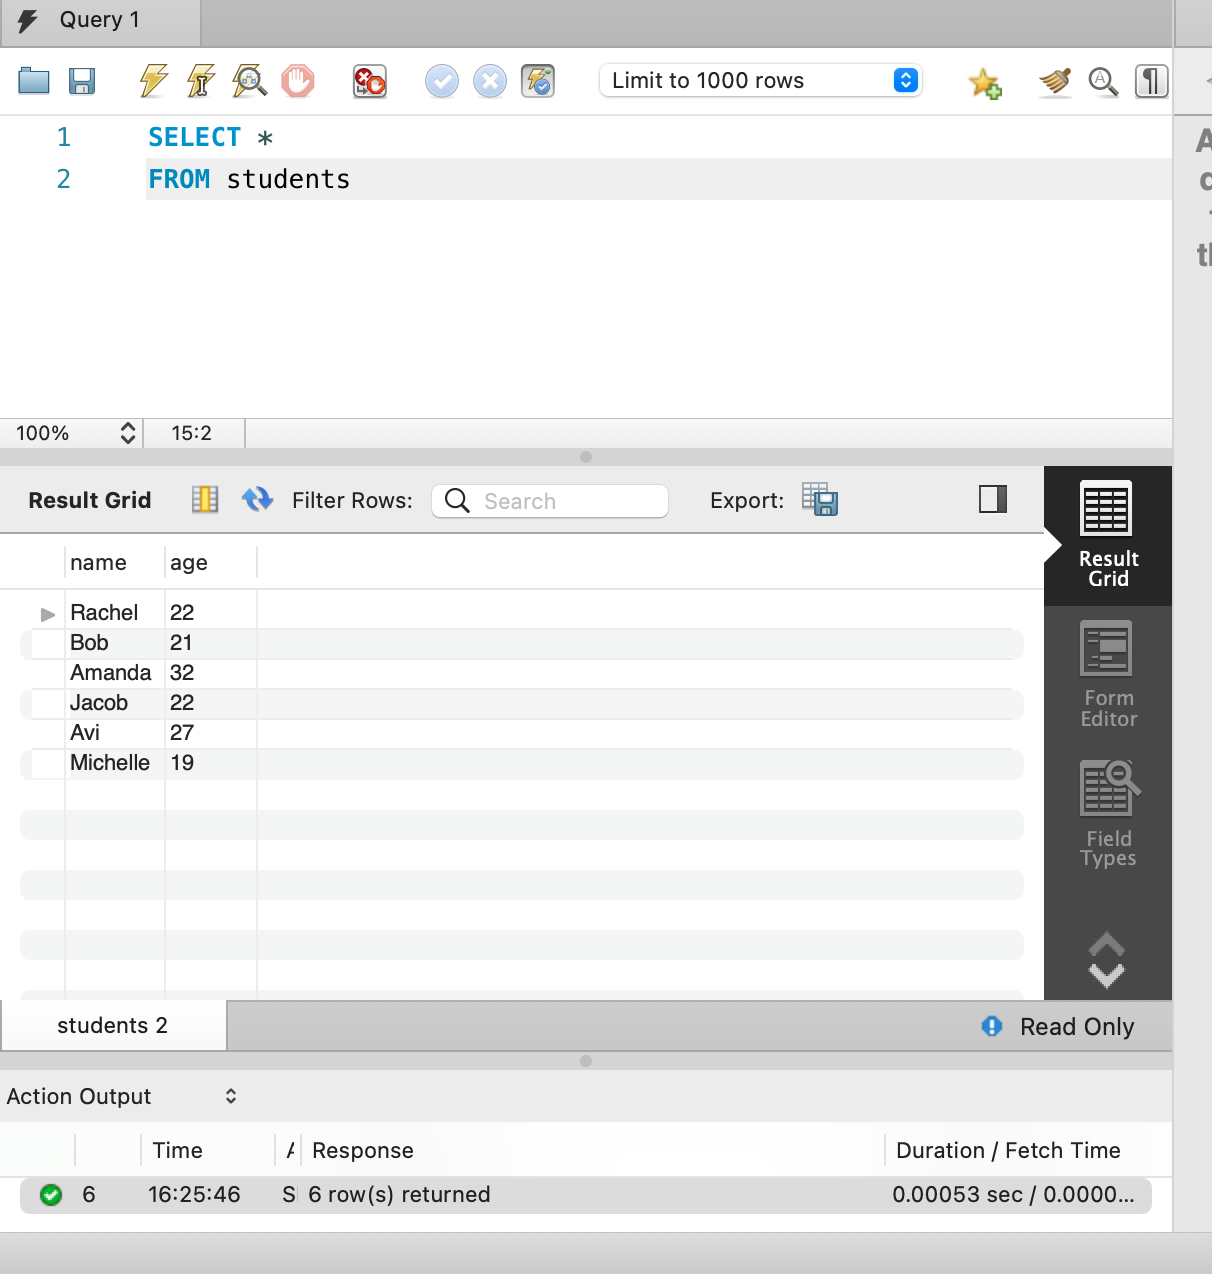

#**Step 6: Selecting and Getting Data from Table**

##To get all row data using python command:

In [ ]:
import mysql.connector

# mySQL connection object
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

# utilizing .execute to use workbench command on python
mycursor.execute("SELECT * FROM students")

#.fetchall() fetchs all of the data from last executed command
# in our case, the command above ("SELECT * FROM students")
myresult = mycursor.fetchall()

for row in myresult:
    print(row)

Once executed, our terminal shows:

('Rachel', 22)

('Bob', 21)

('Amanda', 32)

('Jacob', 22)

('Avi', 27)

('Michelle', 19)

## To get row data from a specific column:

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

# getting age column only
mycursor.execute("SELECT age FROM students")

#.fetchall() fetchs all of the data from last executed command
# in our case, the command above ("SELECT * FROM students")
myresult = mycursor.fetchall()

for row in myresult:
    print(row)

Once executed, our terminal shows:

(22,)

(21,)

(32,)

(22,)

(27,)

(19,)

## To check data but just one example:
useful if you dont want to retrieve all data when checking/debugging or to save memory and time.

use .fetchone instead of .fetchall to return first value

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

# getting age column only
mycursor.execute("SELECT age FROM students")

#.fetchone to only get 1 example
myresult = mycursor.fetchone()

for row in myresult:
    print(row)

Once executed, will return:

22

# **Step 7: Query Conditions w/ WHERE and Wildcards**
##WHERE command
Makes search results more specific.

Creates specific conditions that have to be met in order to return data.
> Let's find students whose age is == 19 (ps I added 2 more entries)

**using column age**

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM students WHERE age =19"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for result in myresult:
    print(result)

Once executed, will return:

('Michelle', 19)

('Sana', 19)

('Harshika', 19)

**using column name**

In [ ]:
sql = "SELECT * FROM students WHERE name = 'Michelle'"

## LIKE Wildcard command
example: "all words that ends or starts with .."

wildcard can find values that "start", "include", or "end" in something

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

# '%a%' == 'a' somewhere inside...or %ac% -> will return Rachel and Jacob
# 'A%' == starts with A
# '%A' == ends with A

sql = "SELECT * FROM students WHERE name LIKE 'A%'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for result in myresult:
    print(result)

Once executed, will return:

('Amanda', 32)

('Avi', 27)

##SQL Injection
Better technique is to use placeholders (%s) and then pass in values so its safer and more secure. Such as next example:

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

#Finds same names
sql = "SELECT * FROM students WHERE name = %S"

#make sure to store as a tuple, since values printed are tuples!
mycursor.execute(sql, ("Michelle", ))

myresult = mycursor.fetchall()

for result in myresult:
    print(result)

Once executed, will show: (ps. i added more michelle inputs)

('Michelle', 19)

('Michelle', 21)

('Michelle', 32)

('Michelle', 19)

#**Step 8: Updating Entries and Limiting Queries**

##Update
Lets say Bob got older, so we have to update his age

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

#update Bob's age to 22 y/o
sql = "UPDATE students SET age = 22 WHERE name = 'Bob'"

mycursor.execute(sql)

mydb.commit()

Once executed, lets refresh WorkBench to see that Bob's age has been updated.

##Limiting Results / Queries
Let's say I have a huge database of values. I don't wanna see so many values in my table, maybe I only wanna see 10 values. Otherwise its just a waste of space and memory requests.

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

# I only want first 5 values
mycursor.execute("SELECT * FROM students LIMIT 5")

myresult = mycursor.fetchall()

# to print in terminal
for result in myresult:
    print(result)

Once executed, will show:
('Rachel', 22)

('Bob', 22)

('Amanda', 32)

('Jacob', 22)

('Avi', 27)

**OFFSET**

What if I dont want to start from the beginning of the database but somewhere specific? Maybe after looking at my table on workbench, I want 5 results but after Amanda aka offsetting my results by 2

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

# I only want first 5 values
mycursor.execute("SELECT * FROM students LIMIT 5 OFFSET 2")

myresult = mycursor.fetchall()

for result in myresult:
    print(result)

Once executed, will show:

('Amanda', 32)

('Jacob', 22)

('Avi', 27)

('Michelle', 19)

('Sana', 19)

# **Step 9: Order Our Querries and Results**

## Alphabetic or Ascending Order
use ORDER BY

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

# name will show alphabetic order, if you use age it'll show by order of age
sql = "SELECT * FROM students ORDER BY name"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for result in myresult:
    print(result)

Once executed, will show:

('Amanda', 32)

('Avi', 27)

('Bob', 22)

('Harshika', 19)

('Jacob', 22)

('Michelle', 19)

('Michelle', 21)

('Michelle', 32)

('Michelle', 19)

('Rachel', 22)

('Sana', 19)

## Descending or Analphabetic Order
use DESC

In [ ]:
mport mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

# age DESC will show ages from high to low
sql = "SELECT * FROM students ORDER BY age DESC"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for result in myresult:
    print(result)

Once executed, will show:

('Amanda', 32)

('Michelle', 32)

('Avi', 27)

('Rachel', 22)

('Bob', 22)

('Jacob', 22)

('Michelle', 21)

('Michelle', 19)

('Sana', 19)

('Harshika', 19)

('Michelle', 19)

# **Step 10: Deleting Entries and Dropping Tables**

## delete entry
All michelle's left the classroom

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

# will delete all instances of michelle
sql = "DELETE FROM students WHERE name = 'Michelle'"

mycursor.execute(sql)

mydb.commit()

If you look at WorkBench, all instances of Michelle have been deleted!

## Delete Whole Table
eventually you will have many tables, and need to get rid of some. Use this command:

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd="i<3waqarkhan",
    database="testdb"
)

mycursor = mydb.cursor()

# IF EXISTS is safe case
sql = "DROP TABLE IF EXISTS students"

mycursor.execute(sql)

mydb.commit()

Now if you open WorkBench, students table will no longer exist!!